In [2]:
#@title File upload
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mnist-original.mat to mnist-original.mat
User uploaded file "mnist-original.mat" with length 55440440 bytes


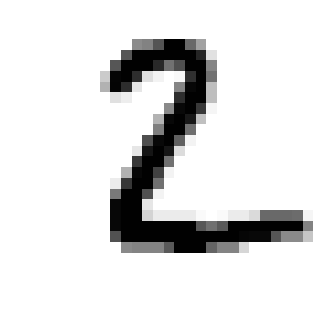

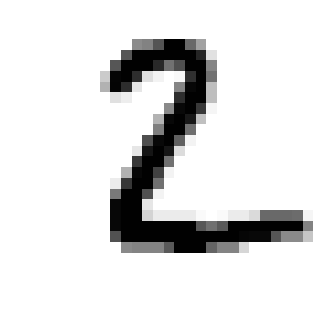

In [18]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

zeroes_data = np.reshape(x_train, [-1, 28*28]).astype('float32') / 255

x_test = np.reshape(x_test, [-1, 28*28]).astype('float32')

imshow(x_test[1])
x_test /= 255
imshow(x_test[1])

In [0]:
#@title Data load
from scipy import io
import matplotlib
import matplotlib.pyplot as plt

mnist = io.loadmat('mnist-original.mat')

zeroes_data = np.transpose(mnist['data'])
np.random.shuffle(zeroes_data)

# zeroes_data = np.transpose(mnist['data'])[:7000] + \
# np.random.normal(scale=8, size=(7000, 784))

plt.imshow(zeroes_data[100].reshape((28, 28)), cmap=matplotlib.cm.bone,
				interpolation='nearest')
plt.axis('off')
plt.show()

In [0]:
def imshow(x):
  plt.imshow(x.reshape((28, 28)), cmap=matplotlib.cm.binary,
				interpolation='nearest')
  plt.axis('off')
  plt.show()

In [0]:
import keras
from keras.layers import Dense, LSTM, RepeatVector, Lambda
from keras.engine import Input
from keras.models import Model
import keras.backend as K

n_inputs = 28*28
n_hidden1 = 512
n_latent = 2 # dimension of latent space
n_hidden2 = n_hidden1
n_outputs = n_inputs

batch_size = 100
n_epochs = 100

In [20]:
x = Input(shape=(n_inputs,)) # input layer

hidden1 = Dense(n_hidden1, activation='tanh')(x) # first hidden layer

# z-paramaters for latent space
mean = Dense(n_latent)(hidden1)
log_sigma = Dense(n_latent)(hidden1)

# helper function to comput z = mu + e * std
def sample(args):
  mean_, log_sig_ = args
  epsilon = K.random_normal(shape=(batch_size, n_latent))
  return mean_ + epsilon * K.exp(log_sig_)

z = Lambda(sample)([mean, log_sigma])

encoder = Model(inputs=x, outputs=z) # the encoder takes raw input and returns z
# encoder.summary()

latent_inputs = Input(shape=(n_latent,))
# shape of latent space is (?, n_latent)

hidden2 = Dense(n_hidden2, activation='relu')(latent_inputs) # LSTM cell 1

# intermediate layer reshapes outputs from first LSTM
# intermediate = Reshape((1, n_hidden3))(hidden3)

# outputs are sigmoid activated, connected to LSTM cell 1
outputs = Dense(n_outputs, activation='sigmoid')(hidden2)

# the decoder takes a set of point in the latent space and returns instances
decoder = Model(inputs=latent_inputs, outputs=outputs)
# decoder.summary()

from keras import losses, optimizers
from keras.layers import Reshape

y = encoder(x)

outputs = decoder(y)
end_to_end = Model(inputs=x, outputs=outputs)
reconstruction_loss = losses.binary_crossentropy(x, outputs)
reconstruction_loss *= n_inputs
kl_loss = 1 + log_sigma - K.square(mean) - K.exp(log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
end_to_end.add_loss(vae_loss)
end_to_end.compile(optimizer=optimizers.Adam(lr=0.00001))
# end_to_end.summary()

end_to_end.fit(x=zeroes_data,
               epochs=n_epochs, batch_size=batch_size)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: Output "model_12" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "model_12" during training.


Epoch 1/100
60000/60000 [==============================] - 5s 91us/step - loss: 202.3920
Epoch 2/100
60000/60000 [==============================] - 5s 87us/step - loss: 172.7992
Epoch 3/100
60000/60000 [==============================] - 5s 86us/step - loss: 166.4171
Epoch 4/100
60000/60000 [==============================] - 5s 86us/step - loss: 163.7491
Epoch 5/100
20800/60000 [=========>....................] - ETA: 3s - loss: 161.8465

60000/60000 [==============================] - 5s 85us/step - loss: 161.7452
Epoch 6/100
60000/60000 [==============================] - 5s 86us/step - loss: 159.9510
Epoch 7/100
60000/60000 [==============================] - 5s 86us/step - loss: 158.0602
Epoch 8/100
60000/60000 [==============================] - 5s 86us/step - loss: 156.4527
Epoch 9/100
33700/60000 [===============>..............] - ETA: 2s - loss: 155.3743

60000/60000 [==============================] - 5s 86us/step - loss: 155.0516
Epoch 10/100
60000/60000 [==============================] - 5s 85us/step - loss: 154.0585
Epoch 11/100
60000/60000 [==============================] - 5s 86us/step - loss: 153.1306
Epoch 12/100
60000/60000 [==============================] - 5s 86us/step - loss: 152.4070
Epoch 13/100
34300/60000 [================>.............] - ETA: 2s - loss: 152.0458

60000/60000 [==============================] - 5s 85us/step - loss: 151.7717
Epoch 14/100
60000/60000 [==============================] - 5s 85us/step - loss: 151.1059
Epoch 15/100
60000/60000 [==============================] - 5s 86us/step - loss: 150.6095
Epoch 16/100
60000/60000 [==============================] - 5s 86us/step - loss: 149.9824
Epoch 17/100
34200/60000 [================>.............] - ETA: 2s - loss: 149.1814

60000/60000 [==============================] - 5s 86us/step - loss: 149.5113
Epoch 18/100
60000/60000 [==============================] - 5s 87us/step - loss: 148.9910
Epoch 19/100
60000/60000 [==============================] - 5s 87us/step - loss: 148.7079
Epoch 20/100
60000/60000 [==============================] - 5s 84us/step - loss: 148.2217
Epoch 21/100
32500/60000 [===============>..............] - ETA: 2s - loss: 147.9530

60000/60000 [==============================] - 5s 86us/step - loss: 147.8358
Epoch 22/100
60000/60000 [==============================] - 5s 85us/step - loss: 147.4977
Epoch 23/100
60000/60000 [==============================] - 5s 84us/step - loss: 147.2000
Epoch 24/100
60000/60000 [==============================] - 5s 85us/step - loss: 146.8591
Epoch 25/100
36300/60000 [=================>............] - ETA: 2s - loss: 146.6389

60000/60000 [==============================] - 5s 87us/step - loss: 146.6558
Epoch 26/100
60000/60000 [==============================] - 5s 88us/step - loss: 146.3328
Epoch 27/100
60000/60000 [==============================] - 5s 87us/step - loss: 146.1240
Epoch 28/100
60000/60000 [==============================] - 5s 87us/step - loss: 145.8359
Epoch 29/100
31100/60000 [==============>...............] - ETA: 2s - loss: 145.5525

60000/60000 [==============================] - 5s 86us/step - loss: 145.6853
Epoch 30/100
60000/60000 [==============================] - 5s 86us/step - loss: 145.3457
Epoch 31/100
60000/60000 [==============================] - 5s 86us/step - loss: 145.1506
Epoch 32/100
60000/60000 [==============================] - 5s 85us/step - loss: 145.1736
Epoch 33/100
33300/60000 [===============>..............] - ETA: 2s - loss: 144.6767

60000/60000 [==============================] - 5s 86us/step - loss: 144.7450
Epoch 34/100
60000/60000 [==============================] - 5s 86us/step - loss: 144.5153
Epoch 35/100
60000/60000 [==============================] - 5s 87us/step - loss: 144.3624
Epoch 36/100
60000/60000 [==============================] - 5s 86us/step - loss: 144.3327
Epoch 37/100
32900/60000 [===============>..............] - ETA: 2s - loss: 143.9510

60000/60000 [==============================] - 5s 86us/step - loss: 144.0251
Epoch 38/100
60000/60000 [==============================] - 5s 85us/step - loss: 143.9122
Epoch 39/100
60000/60000 [==============================] - 5s 83us/step - loss: 143.7211
Epoch 40/100
60000/60000 [==============================] - 5s 84us/step - loss: 143.5888
Epoch 41/100
38800/60000 [==================>...........] - ETA: 1s - loss: 143.4152

60000/60000 [==============================] - 5s 85us/step - loss: 143.4764
Epoch 42/100
60000/60000 [==============================] - 5s 86us/step - loss: 143.2729
Epoch 43/100
60000/60000 [==============================] - 5s 85us/step - loss: 143.1396
Epoch 44/100
60000/60000 [==============================] - 5s 85us/step - loss: 143.0828
Epoch 45/100
35700/60000 [================>.............] - ETA: 2s - loss: 142.5655

60000/60000 [==============================] - 5s 85us/step - loss: 142.8426
Epoch 46/100
60000/60000 [==============================] - 5s 86us/step - loss: 142.7696
Epoch 47/100
60000/60000 [==============================] - 5s 84us/step - loss: 142.6137
Epoch 48/100
60000/60000 [==============================] - 5s 86us/step - loss: 142.4725
Epoch 49/100
34100/60000 [================>.............] - ETA: 2s - loss: 142.3478

60000/60000 [==============================] - 5s 86us/step - loss: 142.4038
Epoch 50/100
60000/60000 [==============================] - 5s 86us/step - loss: 142.2542
Epoch 51/100
60000/60000 [==============================] - 5s 86us/step - loss: 142.2789
Epoch 52/100
60000/60000 [==============================] - 5s 85us/step - loss: 142.0003
Epoch 53/100
33200/60000 [===============>..............] - ETA: 2s - loss: 141.8184

60000/60000 [==============================] - 5s 85us/step - loss: 141.9899
Epoch 54/100
60000/60000 [==============================] - 5s 85us/step - loss: 141.7491
Epoch 55/100
60000/60000 [==============================] - 5s 86us/step - loss: 141.7075
Epoch 56/100
60000/60000 [==============================] - 5s 85us/step - loss: 141.5532
Epoch 57/100
35900/60000 [================>.............] - ETA: 2s - loss: 141.4764

60000/60000 [==============================] - 5s 84us/step - loss: 141.6422
Epoch 58/100
60000/60000 [==============================] - 5s 85us/step - loss: 141.4241
Epoch 59/100
60000/60000 [==============================] - 5s 86us/step - loss: 141.3399
Epoch 60/100
60000/60000 [==============================] - 5s 86us/step - loss: 141.2308
Epoch 61/100
34100/60000 [================>.............] - ETA: 2s - loss: 141.2473

60000/60000 [==============================] - 5s 86us/step - loss: 141.1277
Epoch 62/100
60000/60000 [==============================] - 5s 86us/step - loss: 141.0185
Epoch 63/100
60000/60000 [==============================] - 5s 86us/step - loss: 140.9421
Epoch 64/100
60000/60000 [==============================] - 5s 85us/step - loss: 140.8567
Epoch 65/100
33200/60000 [===============>..............] - ETA: 2s - loss: 140.9059

60000/60000 [==============================] - 5s 86us/step - loss: 140.9126
Epoch 66/100
60000/60000 [==============================] - 5s 86us/step - loss: 140.6510
Epoch 67/100
60000/60000 [==============================] - 5s 86us/step - loss: 140.6377
Epoch 68/100
60000/60000 [==============================] - 5s 86us/step - loss: 140.5263
Epoch 69/100
33500/60000 [===============>..............] - ETA: 2s - loss: 140.3134

60000/60000 [==============================] - 5s 86us/step - loss: 140.5574
Epoch 70/100
60000/60000 [==============================] - 5s 86us/step - loss: 140.3846
Epoch 71/100
60000/60000 [==============================] - 5s 86us/step - loss: 140.2947
Epoch 72/100
60000/60000 [==============================] - 5s 85us/step - loss: 140.2798
Epoch 73/100
32800/60000 [===============>..............] - ETA: 2s - loss: 140.6675

60000/60000 [==============================] - 5s 87us/step - loss: 140.2661
Epoch 74/100
60000/60000 [==============================] - 5s 85us/step - loss: 140.1422
Epoch 75/100
60000/60000 [==============================] - 5s 84us/step - loss: 140.1008
Epoch 76/100
60000/60000 [==============================] - 5s 86us/step - loss: 139.9567
Epoch 77/100
36200/60000 [=================>............] - ETA: 2s - loss: 139.9642

60000/60000 [==============================] - 5s 85us/step - loss: 139.8814
Epoch 78/100
60000/60000 [==============================] - 5s 85us/step - loss: 139.8994
Epoch 79/100
60000/60000 [==============================] - 5s 86us/step - loss: 139.8201
Epoch 80/100
60000/60000 [==============================] - 5s 85us/step - loss: 139.7412
Epoch 81/100
35400/60000 [================>.............] - ETA: 2s - loss: 139.8122

60000/60000 [==============================] - 5s 85us/step - loss: 139.7939
Epoch 82/100
60000/60000 [==============================] - 5s 86us/step - loss: 139.6297
Epoch 83/100
60000/60000 [==============================] - 5s 87us/step - loss: 139.5816
Epoch 84/100
60000/60000 [==============================] - 5s 86us/step - loss: 139.5962
Epoch 85/100
31900/60000 [==============>...............] - ETA: 2s - loss: 139.8565

60000/60000 [==============================] - 5s 85us/step - loss: 139.4457
Epoch 86/100
60000/60000 [==============================] - 5s 85us/step - loss: 139.4178
Epoch 87/100
60000/60000 [==============================] - 5s 86us/step - loss: 139.2845
Epoch 88/100
60000/60000 [==============================] - 5s 86us/step - loss: 139.2779
Epoch 89/100
32400/60000 [===============>..............] - ETA: 2s - loss: 139.1065

60000/60000 [==============================] - 5s 85us/step - loss: 139.3078
Epoch 90/100
60000/60000 [==============================] - 5s 85us/step - loss: 139.1670
Epoch 91/100
60000/60000 [==============================] - 5s 85us/step - loss: 139.0884
Epoch 92/100
60000/60000 [==============================] - 5s 84us/step - loss: 139.1159
Epoch 93/100
35600/60000 [================>.............] - ETA: 2s - loss: 138.8556

60000/60000 [==============================] - 5s 87us/step - loss: 139.0896
Epoch 94/100
60000/60000 [==============================] - 5s 87us/step - loss: 138.9613
Epoch 95/100
60000/60000 [==============================] - 5s 86us/step - loss: 138.8380
Epoch 96/100
60000/60000 [==============================] - 5s 87us/step - loss: 138.8781
Epoch 97/100
30900/60000 [==============>...............] - ETA: 2s - loss: 138.6741

60000/60000 [==============================] - 5s 86us/step - loss: 138.8354
Epoch 98/100
60000/60000 [==============================] - 5s 86us/step - loss: 138.7070
Epoch 99/100
60000/60000 [==============================] - 5s 86us/step - loss: 138.8041
Epoch 100/100
60000/60000 [==============================] - 5s 86us/step - loss: 138.6517


(100, 784)


*********end-to-end************


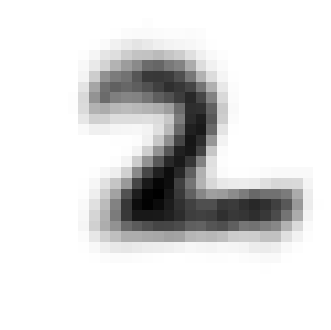





*********actual************


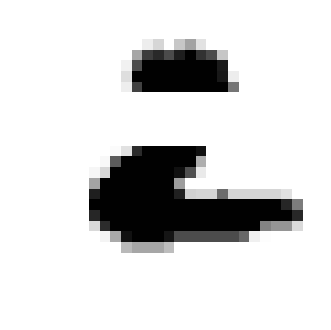





*********generations************




*********gen************


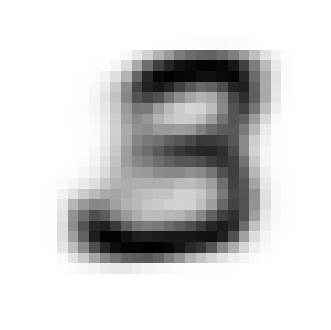





*********gen************


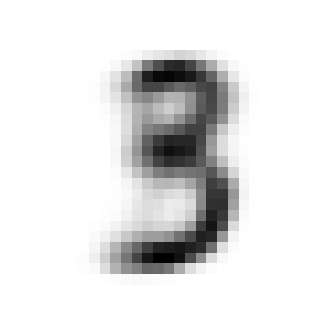





*********gen************


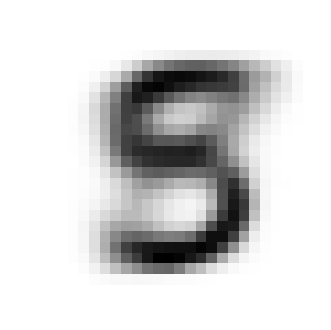





*********gen************


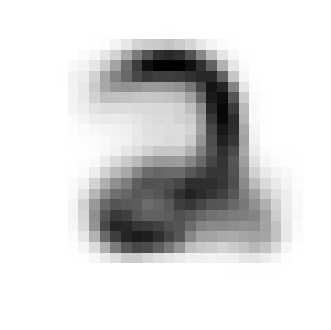





*********gen************


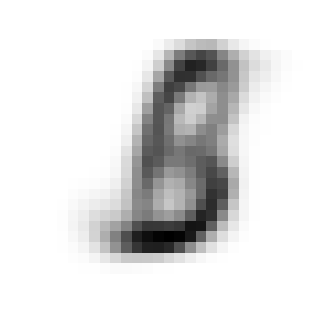





*********gen************


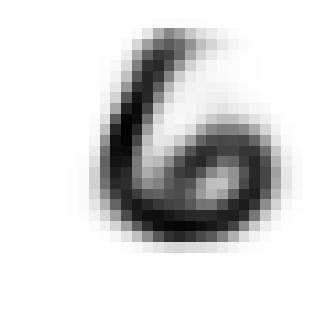

In [24]:
data = zeroes_data[:100]
data[:, 224:365] = 0

print(data.shape)

preds = end_to_end.predict(x=data, batch_size=batch_size)

print('\n\n*********end-to-end************')
imshow(preds[5])
print('\n\n\n\n*********actual************')
imshow(data[5])

codings = np.random.normal(size=(batch_size, n_latent))

preds = decoder.predict(x=codings, batch_size=batch_size)

print('\n\n\n\n*********generations************')
for p in preds[4:10]:
  print('\n*********gen************')
  imshow(p)